In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import pickle

In [2]:
# !pip install matplotlib

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')


In [4]:
# import os
# os.chdir("/content/drive/")

In [5]:
# %cd MyDrive/Colab Notebooks/Room Classification/Train

In [6]:
with open('[7_Classes]X_train.pickle','rb') as f:
    X_train = pickle.load(f)

In [7]:
with open('[7_Classes]y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)

In [8]:
labels = ['bathroom', 'bedroom', 'dining_room', 'exterior', 'interior', 'kitchen', 'living_room']

In [9]:
y_train[:20]

array([1, 6, 3, 2, 6, 6, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 5, 0, 3])

In [10]:
len(X_train)

5600

In [11]:
len(y_train)

5600

<Figure size 720x504 with 0 Axes>

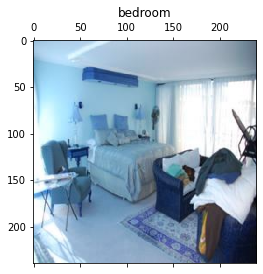

<Figure size 720x504 with 0 Axes>

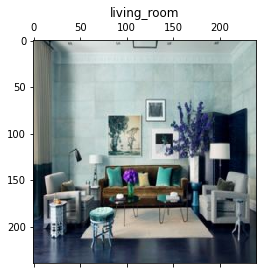

<Figure size 720x504 with 0 Axes>

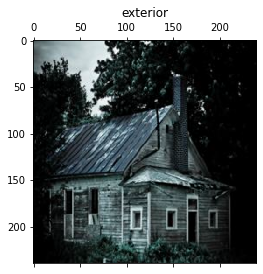

<Figure size 720x504 with 0 Axes>

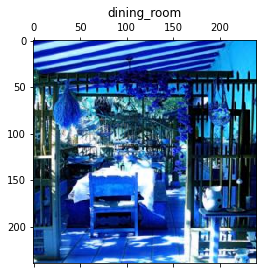

<Figure size 720x504 with 0 Axes>

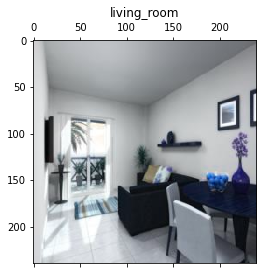

In [12]:
for i in range(5):
    plt.figure(figsize=(10,7))
    plt.matshow(X_train[i])
    plt.title(labels[y_train[i]])
    plt.show()

In [13]:
# X_train = np.array(X_train, copy=False)
y_train = np.array(y_train, copy=False)

In [14]:
X_train.shape

(5600, 240, 240, 3)

In [15]:
X_train[0]

array([[[0.60392594, 0.74118084, 0.8431416 ],
        [0.6044445 , 0.7416994 , 0.8436602 ],
        [0.6086275 , 0.7458824 , 0.84784317],
        ...,
        [0.38562092, 0.44836602, 0.51503265],
        [0.3737255 , 0.4364706 , 0.5031373 ],
        [0.36496732, 0.4277124 , 0.49437907]],

       [[0.6048236 , 0.7420785 , 0.84403926],
        [0.6086275 , 0.7458824 , 0.84784317],
        [0.6128105 , 0.7500654 , 0.85202616],
        ...,
        [0.38562092, 0.44836602, 0.51503265],
        [0.3737255 , 0.4364706 , 0.5031373 ],
        [0.36496732, 0.4277124 , 0.49437907]],

       [[0.6124401 , 0.749695  , 0.8516558 ],
        [0.61339873, 0.7506536 , 0.8526144 ],
        [0.6171024 , 0.75435734, 0.8563181 ],
        ...,
        [0.38616556, 0.44891068, 0.5155773 ],
        [0.3743791 , 0.4371242 , 0.50379086],
        [0.3649891 , 0.4277342 , 0.49440086]],

       ...,

       [[0.93908495, 0.99928105, 0.97115475],
        [0.93326795, 0.9973856 , 0.9886928 ],
        [0.9108932 , 0

In [16]:
y_train.shape

(5600,)

# Training CNN

In [17]:
# model = keras.Sequential([
#                           keras.Input(shape=(256,256,3)),
                          
#                           keras.layers.Conv2D(filters=32, kernel_size=(7,7), strides=(1,1), activation='relu'),
#                           keras.layers.MaxPool2D(pool_size=(2,2)),

#                           keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), activation='relu'),
#                           keras.layers.MaxPool2D(pool_size=(2,2)),

#                           keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu'),
#                           keras.layers.MaxPool2D(pool_size=(2,2)),
#                           keras.layers.Dropout(0.3),

#                           keras.layers.Flatten(),
#                           keras.layers.Dense(32, activation='relu'),
# #                           keras.layers.Dense(32, activation='relu'),
# #                           keras.layers.Dense(64, activation='relu'),
#                           keras.layers.Dense(6, activation='softmax')
# ])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# import datetime
# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [18]:
# model.summary()


In [19]:
# model.fit(X_train, y_train, epochs=15)


In [20]:
# model.save('[7_Classes]model3.h5')

# Transfer Learning

In [21]:
import tensorflow_hub as hub

In [22]:
EfficientNet_B1_URL = "https://tfhub.dev/google/efficientnet/b1/feature-vector/1"
pretrained_model_freezed = hub.KerasLayer(EfficientNet_B1_URL, input_shape=(240,240,3), trainable=False)

In [23]:
model = keras.Sequential([
    pretrained_model_freezed,
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(7, activation='softmax')

])

tb_callback = keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              6575232   
_________________________________________________________________
dense (Dense)                (None, 7)                 8967      
Total params: 6,584,199
Trainable params: 8,967
Non-trainable params: 6,575,232
_________________________________________________________________


In [24]:
model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [25]:
# tf.compat.v1.estimator.tpu.TPUEstimator(use_tpu=False)

In [26]:
model.fit(X_train, y_train, epochs=15, callbacks=[tb_callback])

Epoch 1/15
175/175 [==============================] - 106s 494ms/step - loss: 1.0713 - accuracy: 0.6420
Epoch 2/15
175/175 [==============================] - 81s 466ms/step - loss: 0.4576 - accuracy: 0.8364
Epoch 3/15
175/175 [==============================] - 82s 466ms/step - loss: 0.4176 - accuracy: 0.8574
Epoch 4/15
175/175 [==============================] - 82s 468ms/step - loss: 0.3720 - accuracy: 0.8719
Epoch 5/15
175/175 [==============================] - 82s 468ms/step - loss: 0.3729 - accuracy: 0.8731
Epoch 6/15
175/175 [==============================] - 82s 470ms/step - loss: 0.3407 - accuracy: 0.8867
Epoch 7/15
175/175 [==============================] - 82s 470ms/step - loss: 0.3229 - accuracy: 0.8921
Epoch 8/15
175/175 [==============================] - 82s 469ms/step - loss: 0.2894 - accuracy: 0.9029
Epoch 9/15
175/175 [==============================] - 82s 470ms/step - loss: 0.2868 - accuracy: 0.9074
Epoch 10/15
175/175 [==============================] - 82s 471ms/step - 

In [27]:
model.save('[7_classes]transfer_learning_model4.h5')

In [28]:
# %load_ext tensorboard
# %tensorboard --logdir logs/